In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

# fit a0 + a1*x = y, with analytical method
def linear_fit_analytical(xs, ys, sigmas, xlabel='x', ylabel='y', legloc='upper left', bprint=False, saveloc='tmp.png'):
    x=xs
    y=ys
    cm=1.06
    sig = sigmas
    w = 1/sig**2
    # normalmatrix 2x2
    N = np.zeros((2,2))
    N[0,0] = np.sum(w)
    N[0,1] = np.sum(w * x)
    N[1,0] = np.sum(w * x)
    N[1,1] = np.sum(w * x**2)
    # solution vector
    Y = np.zeros((2,1))
    Y[0] = np.sum(w * y)
    Y[1] = np.sum(w * x * y)
    # mit der Lösung
    a = np.linalg.inv(N)@Y
    # A@B is a shorthand for np.dot(A,B) and retuns the matrix product, while A*B attempts elementwise multiplication
    if bprint:
        print("solution vector:")
        print(a)
    # und der Covarianz-Matrix
    C = np.linalg.inv(N)
    if bprint:
        print("Covarianz Matrix:")
        print(C)
    a0_error = np.sqrt(C[0,0])
    a1_error = np.sqrt(C[1,1])
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
    ax.plot(x, a[0,0] + a[1,0]*x, label='fit', color='red')
    ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, color='black', label='points')
    ax.set_title('$a=%.3f \pm %.3f$ \n $b=%.3f \pm %.3f$' % (a[1], a1_error, a[0], a0_error ))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc=legloc)
    fig.tight_layout(pad=0.1)
    plt.savefig(saveloc)
    plt.show()
    if bprint:
        print('a0 = ', '%.5f' % a[0])
        print('a1 = ', '%.5f' % a[1])
        print('a0_err = ', '%.5f' % a0_error)
        print('a1_err = ', '%.5f' % a1_error)

    return a[1], a[0], a1_error, a0_error

p_a =  954.9250000000001
Z 1 down


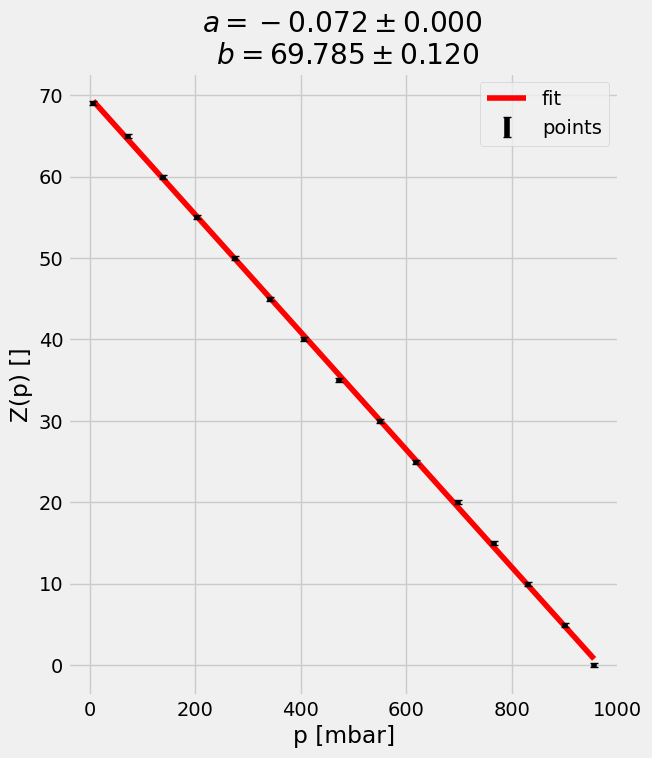

Z(p=0) for Z 1 down is 6.978481e+01
Z_a for Z 1 down is -6.895521e+01
Z 2 down


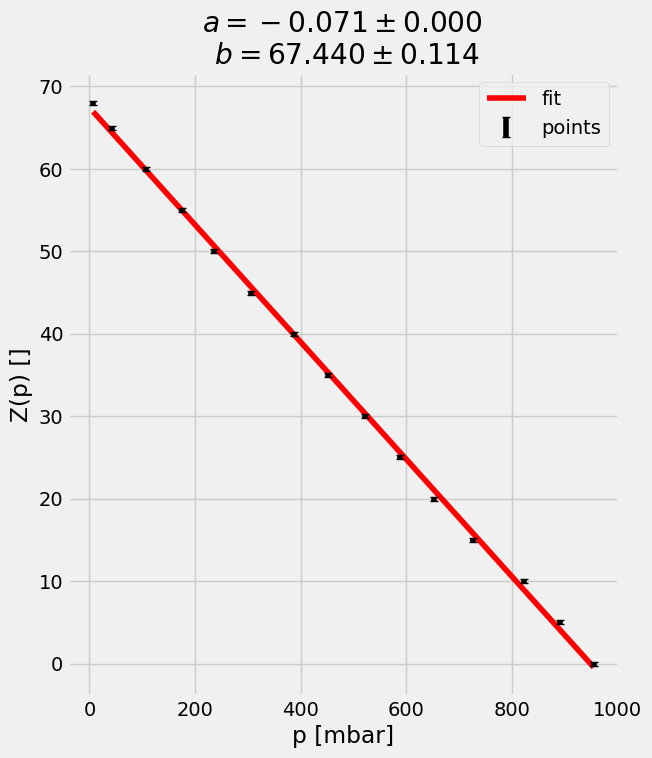

Z(p=0) for Z 2 down is 6.744036e+01
Z_a for Z 2 down is -6.789999e+01
Z 1 up


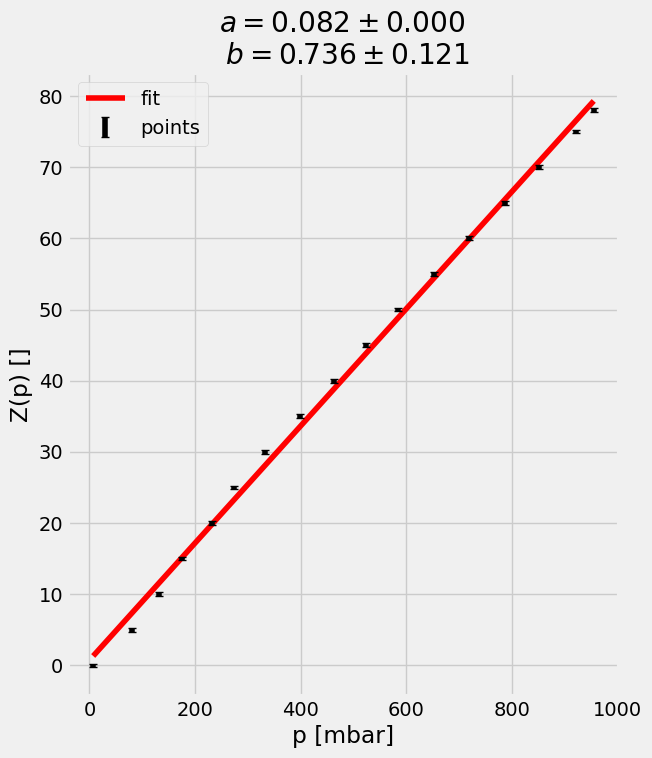

Z(p=0) for Z 1 up is 7.355923e-01
Z_a for Z 1 up is 7.856806e+01
Z 2 up


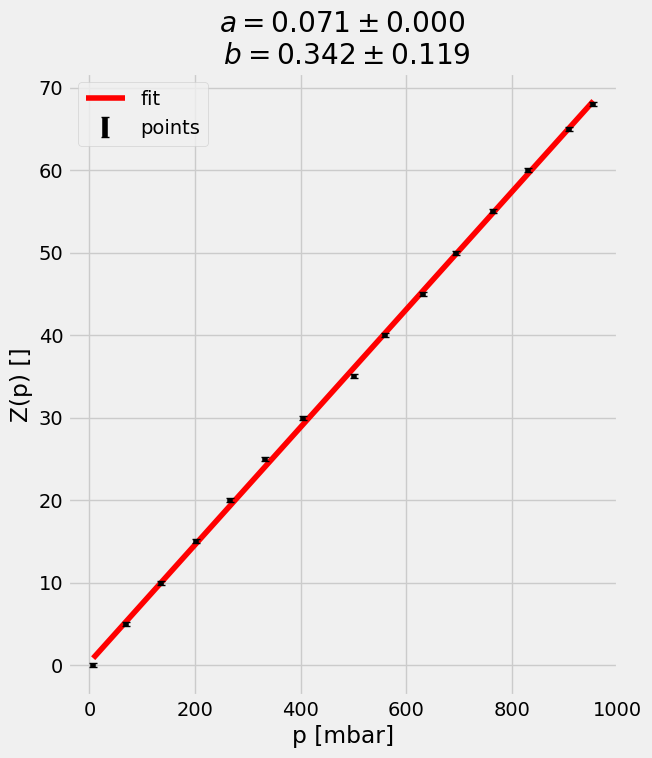

Z(p=0) for Z 2 up is 3.419847e-01
Z_a for Z 2 up is 6.808481e+01


In [36]:
from matplotlib.pyplot import ylabel

# Z(p) = ap+b
def calc_Z(p, a, b):
    return a*p + b

filename = os.path.join(os.getcwd(), "data_2_down.csv")
Z_2down, p_2down = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

filename = os.path.join(os.getcwd(), "data_1_down.csv")
Z_1down, p_1down = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

filename = os.path.join(os.getcwd(), "data_2_up.csv")
Z_2up, p_2up = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

filename = os.path.join(os.getcwd(), "data_1_up.csv")
Z_1up, p_1up = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

# do not change these lists
labels_arr = ["Z 1 down", "Z 2 down", "Z 1 up", "Z 2 up"]
Z_arrarr = [Z_1down, Z_2down, Z_1up, Z_2up]
p_arrarr = [p_1down, p_2down, p_1up, p_2up]

# SETTING P_a pressure value
p_max_values = [np.max(p_arr) for p_arr in p_arrarr]
p_a = np.mean(p_max_values)
print("p_a = ", p_a)

# SETTING UNCERTAINTIES (look inside for loop to see further calculations of propagated uncertainties)
sig_p_reading_and_device=2 #mbar (device has 0.05mbar uncertainty +other fluctuations when letting gas in and stuff)
sig_Z=1/10

# EMPTY LISTS OF VALUES WE'RE GONNA CALCULATE
Z_a_values = np.zeros(4) # Calculated values for the Za
a_values = np.zeros(4) # Calculated slopes 'a'^of Z(p)=ap+b
a_errors_by_fit = np.zeros(4) # Errors calculated together with the slopes (a's) in the fit
b_values = np.zeros(4) # Nullpunktdurchschnitte
b_errors_by_fit = np.zeros(4) # Nullpunktdurchschnitt fehler von fits
for i in range(0,len(Z_arrarr)):
    Z,p=Z_arrarr[i], p_arrarr[i]
    print(labels_arr[i])
    dZ_dp= Z[-1]/p[0] if i <= 1 else Z[-1]/p[-1] # dZ_dp is approximately the Z range over the largest p... (not exactly but almost)
    sig_prop_p_to_Z = np.sqrt((sig_p_reading_and_device**2) * (dZ_dp**2)) # The error from p goes to an error of Z by error propagation formulas
    sig_Z_tot=sig_Z+sig_prop_p_to_Z
    sig=np.ones(len(Z))*sig_Z_tot
    a,b,a_err,b_err = linear_fit_analytical(p,Z,sig, xlabel='p [mbar]', ylabel='Z(p) []', legloc=('upper right' if i <= 1 else 'upper left'), saveloc=("%s.png" % (labels_arr[i])))
    Z_0 = calc_Z(0.0, a, b)
    print("Z(p=0) for %s is %.6e" % (labels_arr[i], Z_0))
    Z_a = calc_Z(p_a,a,b) - calc_Z(0.0,a,b)
    print("Z_a for %s is %.6e" % (labels_arr[i], Z_a))
    Z_a_values[i] = np.abs(Z_a)
    a_values[i], a_errors_by_fit[i] = np.abs(a), a_err
    b_values[i],b_errors_by_fit[i]=b, b_err


In [12]:
print("All the Z_a values are: ", Z_a_values)
print("Mean of the Z_a Values:", np.mean(Z_a_values))

# slopes of Z(p) to calculate the rest -> average(a), std(a)
print("All the slope (a) values of Z(p) are: ", a_values)
print("The mean slope (a) value of Z(p) is: %.9e and the standard deviation is %9e" % (np.mean(a_values), np.std(a_values)))
print("The fitting errors are: ", a_errors_by_fit)


# all data sets all graphs, see above


# all standard deviations and all uncertainties


# show all the equations especially those belonging to the graphs
# TODO Z(p)=???

All the slope (a) values of Z(p) are:  [0.07221008 0.07110505 0.08227668 0.0712986 ]
The mean slope (a) value of Z(p) is: 7.422260272e-02 and the standard deviation is 4.668708e-03
The fitting errors are:  [0.00021203 0.00020818 0.00021651 0.00020876]


In [ ]:
# Calculate the other stuff:
